In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install librosa

In [3]:
import librosa

In [4]:
audio_path = 'example.mp3'

In [5]:
y, sr = librosa.load(audio_path, sr=None) #sr --> sampling rate

In [6]:
type(y)

numpy.ndarray

In [7]:
y.shape

(2022912,)

In [8]:
sr #Hz sampling rate

44100

In [9]:
2022912 / 44100  #Time of music = samples / sr

45.87102040816327

In [10]:
y

array([ 0.0000000e+00, -7.4242797e-14,  1.2711236e-13, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

Text(0, 0.5, 'Amplitude')

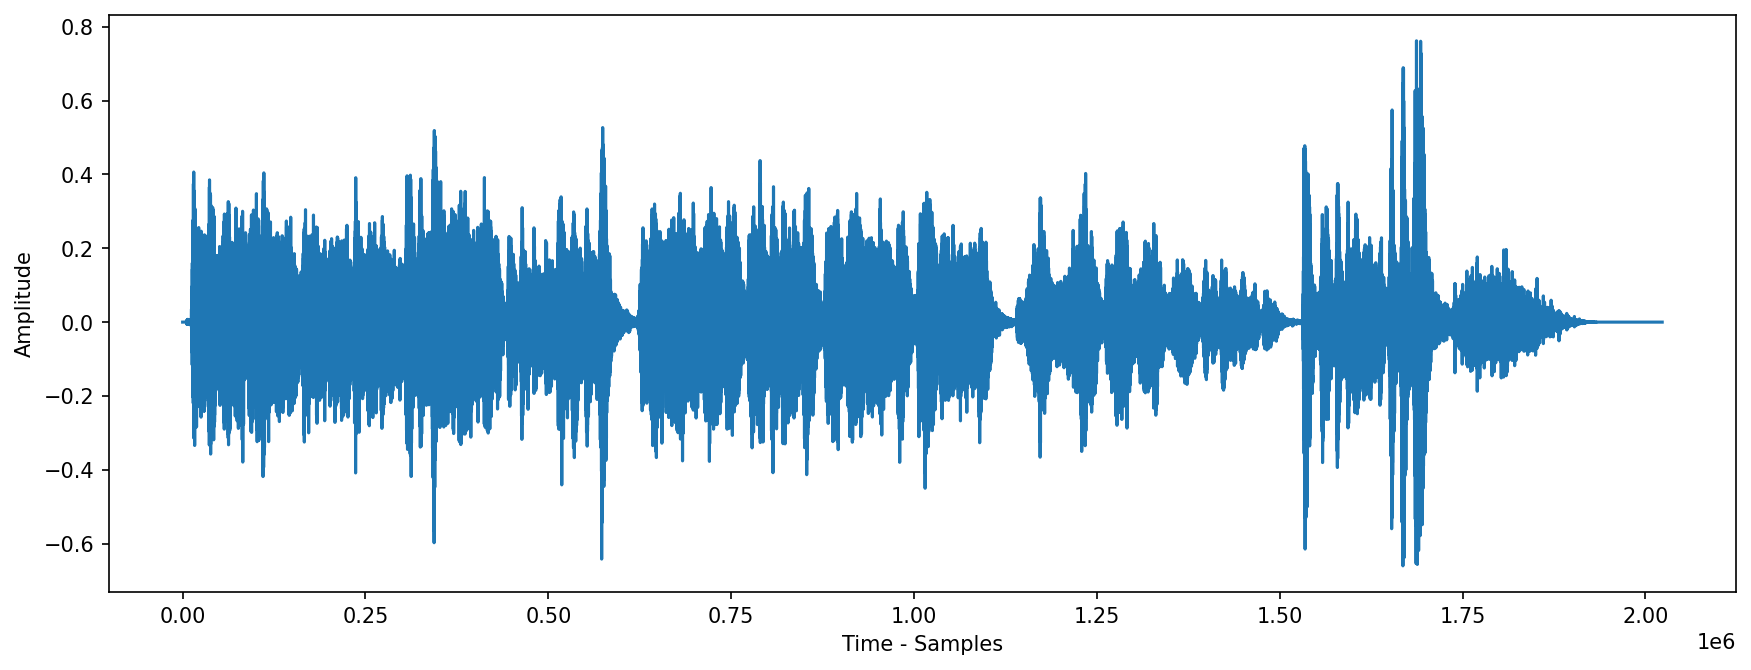

In [15]:
plt.figure(figsize=(14, 5), dpi=150)
plt.plot(y)
plt.xlabel('Time - Samples')
plt.ylabel('Amplitude')

In [16]:
from IPython.display import Audio

In [17]:
Audio(data=y, rate=sr)

In [18]:
#DFT - Discrete Fourier Transform
window = np.hanning(len(y))
windowed_input = y * window
dft = np.fft.rfft(windowed_input)

In [19]:
dft

array([ 2.00039231e+00+0.00000000e+00j,  8.95494627e-01-4.80658688e+00j,
       -1.12352812e+00+1.22522181e+00j, ...,
        1.61597591e-04+4.58720450e-04j,  8.23178778e-05-5.14444943e-04j,
       -2.54767040e-04+0.00000000e+00j])

In [20]:
amplitude = np.abs(dft)

In [22]:
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

In [23]:
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(y))

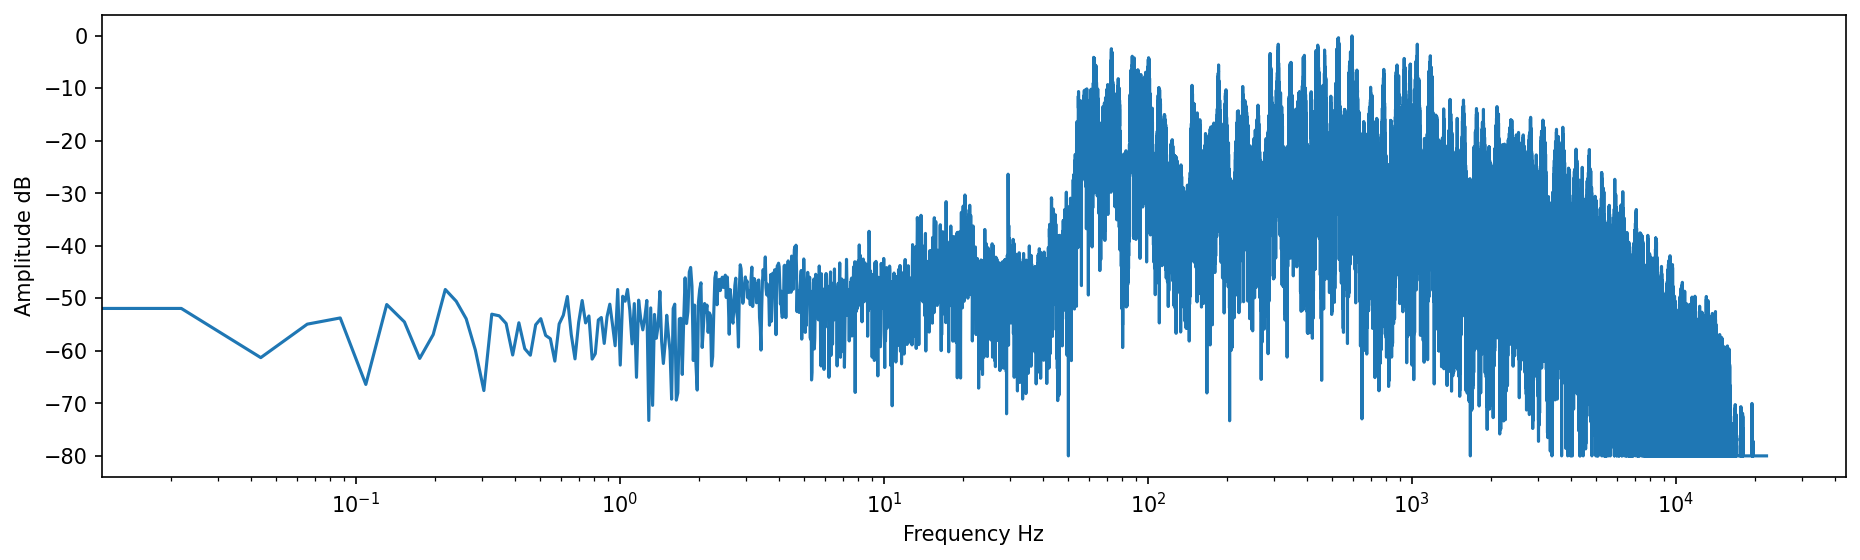

In [24]:
plt.figure(figsize=(15, 4), dpi=150)
plt.plot(frequency, amplitude_db)
plt.xlabel('Frequency Hz')
plt.ylabel('Amplitude dB')
plt.xscale('log')

In [25]:
D = librosa.stft(y)
D_dB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

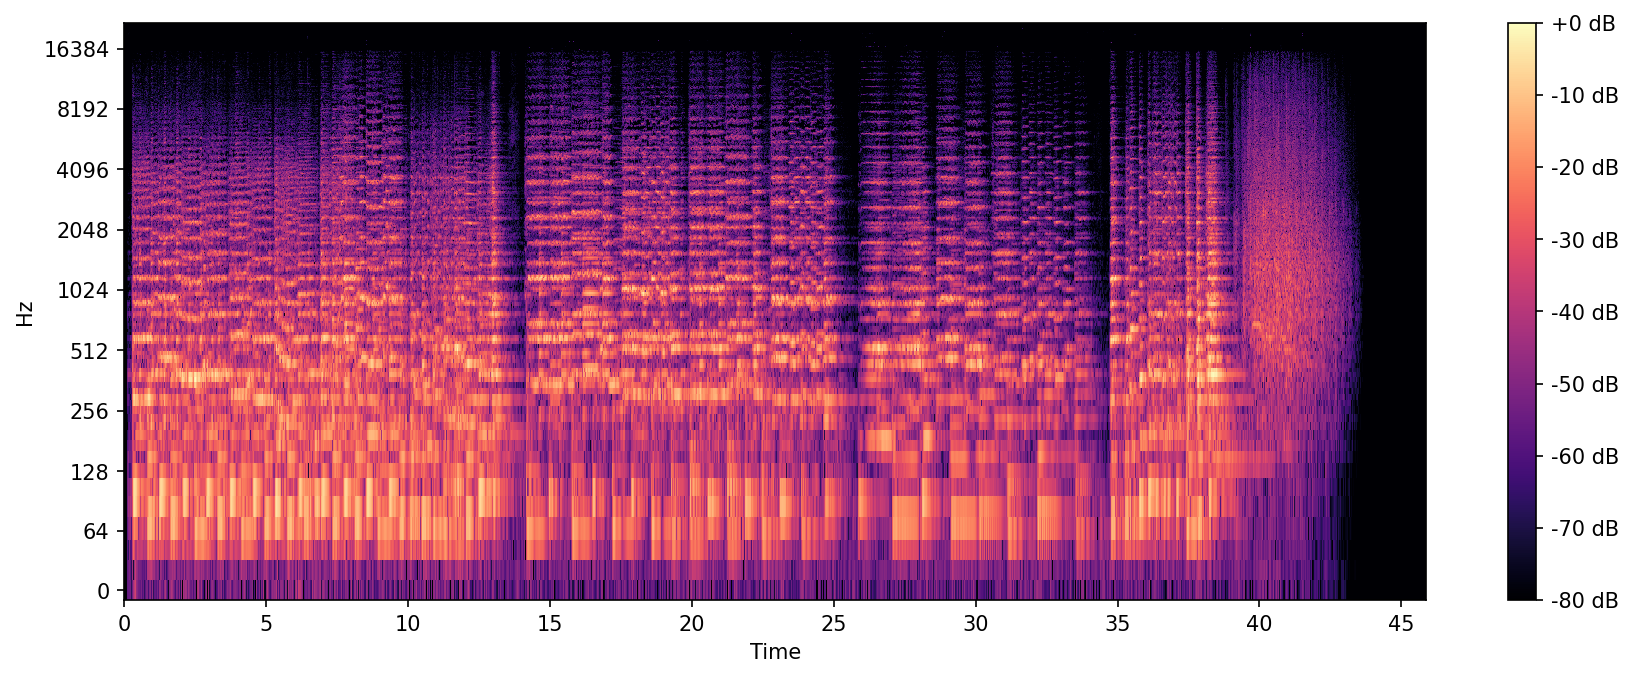

In [27]:
#Spectrogram
plt.figure(figsize=(14, 5), dpi=150)
librosa.display.specshow(D_dB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format = '%+2.0f dB');

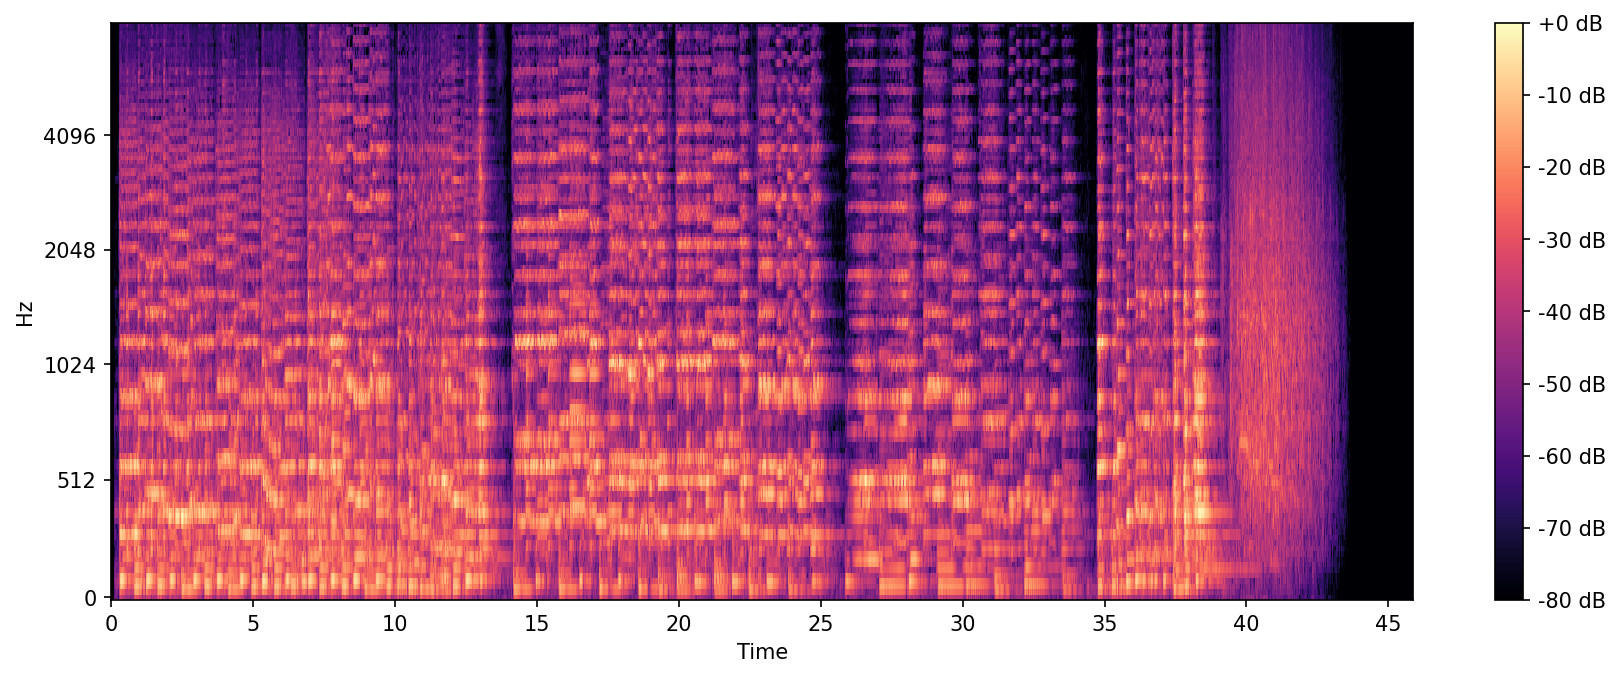

In [29]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

#Spectrogram
plt.figure(figsize=(14, 5), dpi=150)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format = '%+2.0f dB');